# 책과 텐서플로우 버전 맞추기

In [ ]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# 필요한 모듈 불러오기

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'1.15.2'

# 하이퍼파라미터 설정하기

In [ ]:
learning_rate = 0.01
num_epochs = 1000
step_display = 50

# 학습에 이용할 데이터 정의

In [ ]:
x = [2.7, 4.8, 9.3, 13.4, 24.8, 31.3, 48.5, 53.0, 68.1, 74.2, 88.6, 94.5]
y = [7.0, 28.8, 22.8, 67.1, 48.8, 100.2, 140.0, 190.2, 215.2, 285.6, 260.3, 251.1]

In [ ]:
assert len(x) == len(y)
len(x)

12

In [ ]:
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='bias')

In [ ]:
x_true = tf.placeholder(dtype=tf.float32, name='x_true')
y_true = tf.placeholder(dtype=tf.float32, name='y_true')

# 그래프 만들기

In [ ]:
y_pred = tf.add(tf.multiply(weight,x_true), bias)

In [ ]:
cost = tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 학습 시작하기

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
for epoch in range(num_epochs):   # 책의 예제에는 xrange(...) 라고 되어 있는데
                                  # 파이썬 2.x 버전의 함수이므로 3.x 에 맞는
                                  # range(...) 함수를 사용하였습니다.
  _, c = sess.run([optimizer,cost], feed_dict={x_true: x, y_true: y})
  if (epoch+1) % step_display == 0:
    print("Epoch: {0}, cost: {1}, weight: {2}, bias: {3}".format(
        epoch+1, c, sess.run(weight), sess.run(bias)))
print("최적화 작업을 완료 했습니다.")

Epoch: 50, cost: 8751.9658203125, weight: [1.4052405], bias: [0.26585364]
Epoch: 100, cost: 5132.0166015625, weight: [1.8296872], bias: [0.6920311]
Epoch: 150, cost: 2927.977294921875, weight: [2.182255], bias: [1.0484176]
Epoch: 200, cost: 1699.1142578125, weight: [2.461854], bias: [1.3344259]
Epoch: 250, cost: 1077.8685302734375, weight: [2.6722252], bias: [1.5541452]
Epoch: 300, cost: 795.19140625, weight: [2.821695], bias: [1.7160038]
Epoch: 350, cost: 679.8982543945312, weight: [2.921716], bias: [1.8313199]
Epoch: 400, cost: 637.7970581054688, weight: [2.9846864], bias: [1.9122012]
Epoch: 450, cost: 624.0075073242188, weight: [3.0219676], bias: [1.9696647]
Epoch: 500, cost: 619.925048828125, weight: [3.0426943], bias: [2.0125291]
Epoch: 550, cost: 618.7966918945312, weight: [3.053469], bias: [2.0471473]
Epoch: 600, cost: 618.4663696289062, weight: [3.05864], bias: [2.0776896]
Epoch: 650, cost: 618.3258056640625, weight: [3.0608501], bias: [2.106679]
Epoch: 700, cost: 618.222900390

In [ ]:
training_cost = sess.run(cost, feed_dict={x_true: x, y_true: y})
print("최종 cost: {}".format(c))
print("최종 weight: {}".format(sess.run(weight)))
print("최종 bias: {}".format(sess.run(bias)))

최종 cost: 617.5911254882812
최종 weight: [3.0594492]
최종 bias: [2.327825]


# 그래프로 직선 비교하기

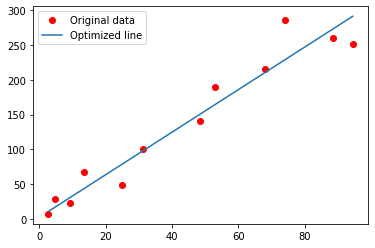

In [ ]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, sess.run(weight) * x + sess.run(bias), label='Optimized line')
plt.legend()
plt.show()

In [ ]:
sess.close()